In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('movies2.csv')

In [3]:
df = data.copy()

In [4]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              9400 non-null   int64         
 1   original_title  9400 non-null   object        
 2   overview        9399 non-null   object        
 3   release_date    9400 non-null   datetime64[ns]
 4   popularity      9400 non-null   float64       
 5   vote_average    9400 non-null   float64       
 6   vote_count      9400 non-null   int64         
 7   genre_names     9400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 587.6+ KB


In [6]:
df.describe()

,id,release_date,popularity,vote_average,vote_count
count,9.400000e+03,9400,9400.000000,9400.000000,9400.000000
mean,1.886253e+05,2004-11-01 05:07:54.893617024,42.855597,6.636562,1971.110319
min,2.000000e+00,1902-04-17 00:00:00,0.020000,3.270000,300.000000
25%,1.004650e+04,1998-02-09 18:00:00,16.841750,6.114750,466.000000
50%,3.665250e+04,2009-09-24 00:00:00,24.360500,6.658000,842.000000
75%,3.440978e+05,2016-11-04 00:00:00,38.226000,7.200000,1966.000000
max,1.212073e+06,2024-05-23 00:00:00,3629.389000,8.705000,35768.000000
std,2.501381e+05,NaN,90.352175,0.782143,3092.303425


In [7]:
df['id'] = df['id'].astype(str)

In [8]:
df.describe()

,release_date,popularity,vote_average,vote_count
count,9400,9400.000000,9400.000000,9400.000000
mean,2004-11-01 05:07:54.893617024,42.855597,6.636562,1971.110319
min,1902-04-17 00:00:00,0.020000,3.270000,300.000000
25%,1998-02-09 18:00:00,16.841750,6.114750,466.000000
50%,2009-09-24 00:00:00,24.360500,6.658000,842.000000
75%,2016-11-04 00:00:00,38.226000,7.200000,1966.000000
max,2024-05-23 00:00:00,3629.389000,8.705000,35768.000000
std,NaN,90.352175,0.782143,3092.303425


In [9]:
df.columns

Index(['id', 'original_title', 'overview', 'release_date', 'popularity',
       'vote_average', 'vote_count', 'genre_names'],
      dtype='object')

In [10]:
grouped_data_by_populaarity = df.groupby('original_title')['popularity'].sum().sort_values(ascending=False)

In [11]:
grouped_data_by_populaarity

original_title
The Fall Guy                         3831.042
Kingdom of the Planet of the Apes    3629.389
Godzilla x Kong: The New Empire      3148.883
Civil War                            2767.933
Furiosa: A Mad Max Saga              1193.177
                                       ...   
Сталинград                              0.517
Pari e dispari                          0.452
G.B.F.                                  0.328
火垂るの墓                                   0.037
蛍火の杜へ                                   0.020
Name: popularity, Length: 9080, dtype: float64

In [12]:
df.describe(include='object')

,id,original_title,overview,genre_names
count,9400,9400,9399,9400
unique,9340,9080,9334,2036
top,13689,Return,A pastor of a small church in upstate New York...,['Comedy']
freq,2,8,2,556


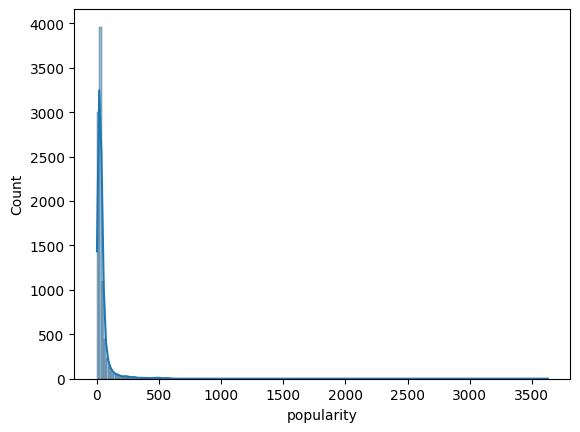

In [13]:
plt.Figure(figsize=(8,6))
sns.histplot(df['popularity'],kde=True)
plt.show()

In [14]:
fig1 = px.histogram(df,x='popularity',nbins=40,histnorm='density',opacity=0.5)

In [15]:
fig1

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
df['popularity'] = scaler.fit_transform(df[['popularity']])

In [19]:
fig2 = px.histogram(df,x='popularity',nbins=40)

In [20]:
fig2

In [21]:
df['year']=df['release_date'].dt.year

In [22]:
df.head()

,id,original_title,overview,release_date,popularity,vote_average,vote_count,genre_names,year
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,0.810011,8.705,26221,"['Drama', 'Crime']",1994
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,1.383310,8.695,19877,"['Drama', 'Crime']",1972
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,1.350924,8.576,12001,"['Drama', 'Crime']",1974
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,0.378355,8.567,15409,"['Drama', 'History', 'War']",1993
4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,0.373120,8.541,8276,['Drama'],1957


In [23]:
movies_per_year = df['year'].value_counts().sort_values(ascending=False)

In [24]:
movies_per_year

year
2018    402
2017    394
2016    381
2019    377
2014    374
       ... 
1929      1
1918      1
1916      1
1903      1
1915      1
Name: count, Length: 110, dtype: int64

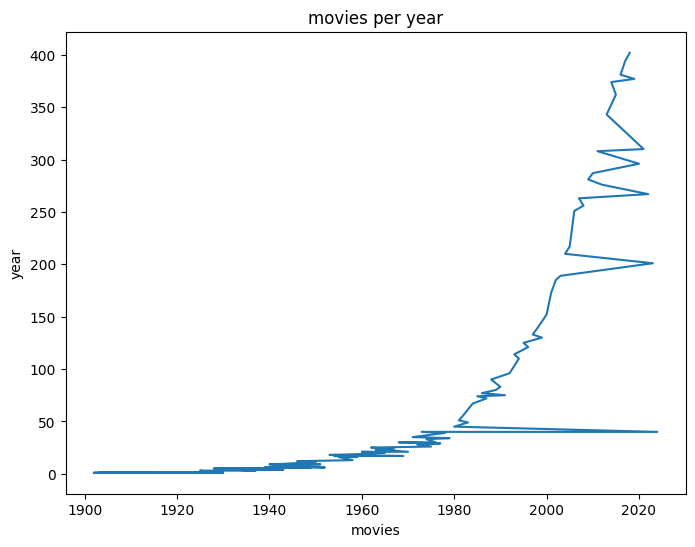

In [25]:
movies_per_year.plot(kind='line',figsize=(8,6))
plt.title('movies per year')
plt.xlabel('movies')
plt.ylabel('year')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              9400 non-null   object        
 1   original_title  9400 non-null   object        
 2   overview        9399 non-null   object        
 3   release_date    9400 non-null   datetime64[ns]
 4   popularity      9400 non-null   float64       
 5   vote_average    9400 non-null   float64       
 6   vote_count      9400 non-null   int64         
 7   genre_names     9400 non-null   object        
 8   year            9400 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 624.3+ KB


<Axes: >

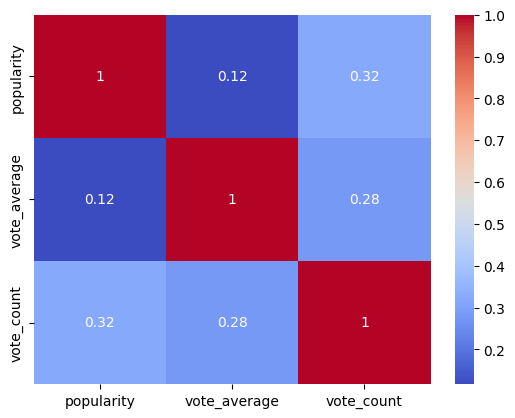

In [27]:
corr = df[['popularity','vote_average','vote_count']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')